In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from math import *

In [3]:
def prod(A,b):
    c = []
    for i in range(len(b)):
        c.append(sum([A[i][j] * b[j] for j in range(len(b))]))
    return(c)

def jacobiIteration(x_k,A,b):
    x_k1 = []
    for i in range(len(x_k)):
        C = sum([A[i][j] * x_k[j] for j in range(i)]) + sum([A[i][j] * x_k[j] for j in range(i+1,len(b))])
        x_k1.append((b[i] - C)/A[i][i])
    return(x_k1)

        

In [57]:
def test(A,b,xi,iteration,niter,xe,titolo):
    asse_x = [float(i) for i  in range(0,niter+1)]
    asse_y = [sqrt(sum([(xi[j]-xe[j])**2 for j in range(len(xe))]))]

    ax = [i for i in range(len(xe))]
    plt.plot(ax,xi)
    
    for i in range(niter):
        xi = iteration(xi,A,b)
        norm = sqrt(sum([(xi[j]-xe[j])**2 for j in range(len(xe))]))
        asse_y.append(norm)
        plt.plot(ax,xi)
    
    plt.grid()
    plt.show()

    plt.plot(asse_x,asse_y)
    plt.title(titolo)
    plt.xlabel("Iterations")
    plt.ylabel("|| e^k ||")
    plt.grid()
    plt.show()
    print(asse_x[0],asse_y[0])


In [60]:
def triDiag1(n):
    A = [[0 for j in range(n)] for i in range(n)]
    A[0][0] = 2
    for i in range(1,n):
        A[i][i] = 2
        A[i-1][i] = 1
        A[i][i-1] = 1
    
    return A

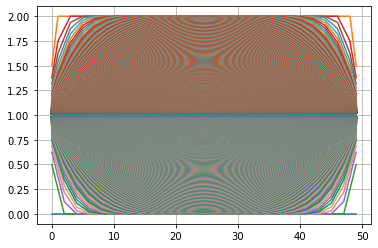

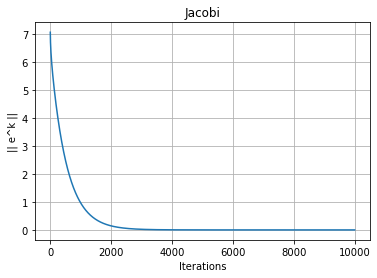

0.0 7.0710678118654755


In [65]:
n = 50
A = triDiag1(n)
xe = [1. for i in range(n)]
b = prod(A,xe)
x0 = [0. for i in range(n)]
test(A,b,x0,jacobiIteration,10000,xe,"Jacobi")